<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/keep/Mini-bads3/Module3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #comment

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#https://drive.google.com/file/d/1tV3wDsawGcH-XjWXfWnHWGeNbf0Tp46q/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1tV3wDsawGcH-XjWXfWnHWGeNbf0Tp46q'})
fileDownloaded.GetContentFile('Supermarket.csv')

In [4]:
df2 = pd.read_csv('Supermarket.csv')
df2.head()

'''import time
chunksize = 10 ** 6
df2 = pd.DataFrame()
start = time.time()
for chunk in pd.read_csv('Supermarket.csv', iterator=True, chunksize = chunksize):
  df2 = pd.concat([df2,chunk])
end = time.time()
print("Loading time usage = ", end - start, " second. ")'''

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


'import time\nchunksize = 10 ** 6\ndf2 = pd.DataFrame()\nstart = time.time()\nfor chunk in pd.read_csv(\'Supermarket.csv\', iterator=True, chunksize = chunksize):\n  df2 = pd.concat([df2,chunk])\nend = time.time()\nprint("Loading time usage = ", end - start, " second. ")'

In [5]:
print(df2.shape)
print(df2.head())
print(df2.describe())
print(df2.info())

(3158469, 22)
   SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND   PROD_CODE  \
0     200812   20080516             6          9         1   0.01  PRD0902611   
1     200646   20070108             2         16         1   1.61  PRD0901483   
2     200812   20080518             1         15         3   0.03  PRD0900841   
3     200632   20061005             5         10         1   1.11  PRD0904263   
4     200707   20070415             1          8        23   0.23  PRD0902611   

  PROD_CODE_10 PROD_CODE_20 PROD_CODE_30  ... CUST_PRICE_SENSITIVITY  \
0      CL00241     DEP00086       G00028  ...                     XX   
1      CL00236     DEP00084       G00028  ...                     XX   
2      CL00212     DEP00070       G00022  ...                     XX   
3      CL00248     DEP00089       G00030  ...                     XX   
4      CL00241     DEP00086       G00028  ...                     XX   

  CUST_LIFESTAGE        BASKET_ID BASKET_SIZE  BASKET_PRICE_SENSIT

#Option1


In [6]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=6745f2b9dce114fdb54748cfa1d2a7a85e8218e8508ad4ee862050af54b70fc5
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [7]:
sql ='''
SELECT CUST_CODE, 
COUNT(DISTINCT BASKET_ID)/COUNT(DISTINCT SHOP_WEEK) AS VISIT_PER_WEEK,
COUNT(DISTINCT SHOP_WEEK) AS TOTAL_WEEK,
COUNT(DISTINCT PROD_CODE) AS TOTAL_PRODUCT,
SUM(SPEND) AS TOTAL_SALES
FROM df2
WHERE CUST_CODE IS NOT NULL GROUP BY CUST_CODE
HAVING TOTAL_SALES < 4000
'''
from pandasql import sqldf
df = sqldf(sql)
print(df.head())

        CUST_CODE  VISIT_PER_WEEK  TOTAL_WEEK  TOTAL_PRODUCT  TOTAL_SALES
0  CUST0000000013               1          12             79       160.32
1  CUST0000000055               1          15             41       433.65
2  CUST0000000679               1          12             36        85.63
3  CUST0000001052               1          28             42       260.92
4  CUST0000001058               1           2             18        71.50


#Option2

In [8]:
df = pd.DataFrame()
df['VISIT_PER_WEEK'] = (df2.groupby('CUST_CODE').BASKET_ID.nunique()/df2.groupby('CUST_CODE').SHOP_WEEK.nunique()).astype(int)
df['TOTAL_WEEK'] = df2.groupby('CUST_CODE').SHOP_WEEK.nunique()
df['TOTAL_PRODUCT'] = df2.groupby('CUST_CODE').PROD_CODE.nunique()
df['TOTAL_SALES'] = df2.groupby('CUST_CODE').SPEND.sum()
df = df[df['TOTAL_SALES'] < 4000]

print(df)
#type(df)

                VISIT_PER_WEEK  TOTAL_WEEK  TOTAL_PRODUCT  TOTAL_SALES
CUST_CODE                                                             
CUST0000000013               1          12             79       160.32
CUST0000000055               1          15             41       433.65
CUST0000000679               1          12             36        85.63
CUST0000001052               1          28             42       260.92
CUST0000001058               1           2             18        71.50
...                        ...         ...            ...          ...
CUST0000997627               1         109            438      1769.14
CUST0000998609               1          13             18        53.86
CUST0000998851               1          16            100       394.92
CUST0000998907               1         105            527      3721.02
CUST0000999786               1          80            202       802.52

[4794 rows x 4 columns]


In [9]:
#df = df.reset_index()
#df.sort_values(by="TOTAL_SALES",ascending=False, inplace=True)
#df.head()

In [10]:
x = df.iloc[:,1:-1] #1:3
x.head(5)

,TOTAL_WEEK,TOTAL_PRODUCT
CUST_CODE,,
CUST0000000013,12,79
CUST0000000055,15,41
CUST0000000679,12,36
CUST0000001052,28,42
CUST0000001058,2,18


In [11]:
y = df.iloc[:,-1:] # 3
y.head(5)

,TOTAL_SALES
CUST_CODE,
CUST0000000013,160.32
CUST0000000055,433.65
CUST0000000679,85.63
CUST0000001052,260.92
CUST0000001058,71.50


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(type(x_train)," shape = ",x_train.shape)
print(type(x_train)," shape = ",x_test.shape)

<class 'pandas.core.frame.DataFrame'>  shape =  (3835, 2)
<class 'pandas.core.frame.DataFrame'>  shape =  (959, 2)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(x_train, y_train)

print(reg.coef_)
print(reg.intercept_)
y_pred1 = reg.predict(x_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred1))
print('r2_score: %.2f' % r2_score(y_test, y_pred1))

[[6.61246253 4.51085195]]
[-144.49905974]
Mean squared error: 129915.24
r2_score: 0.85


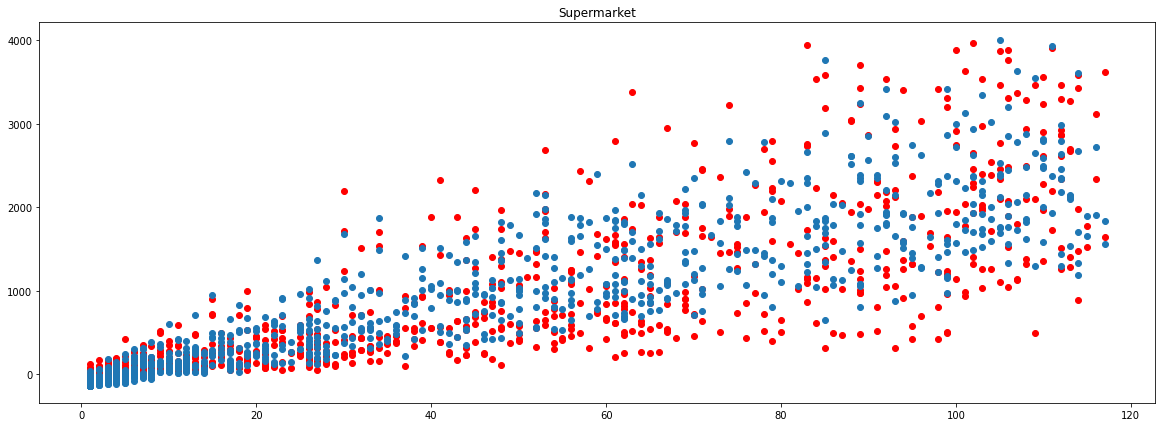

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,7))

plt.scatter(x_test['TOTAL_WEEK'], y_test, color="red")
plt.scatter(x_test['TOTAL_WEEK'], y_pred1)

plt.title('Supermarket')

#plt.xlabel(x_test.columns[i])
#plt.ylabel(y_test.columns[0])
plt.show()



# More example

# Exercise
### 1. Predict house price from this dataset https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt

### 2. https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv#

- Use linear regression to build a model for prediction <br>
- Plot graph


In [31]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt',sep=',')
df3.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
